### Group Assignment 3 -- Week 4
I am using a new dataset this week to better align with our project goals. I am using data from CalFire that contains information about property damgage from the recent and devastating Eaton and Palisades Fires. After reading the noe classic essay "The Case for Letting Malibu Burn," originally written in 1998, it is clear that different containment strategies must be implemented to at least attempt to slow down future wildfires. 

Guiding question: Can native flora like the coast live oak play a role in suppressing future fires?
Goal: Map structure damage to eventually join with coast live oak presence to discover any visual geospatial correlations 

#### Getting started and general data exploration

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
firedf = pd.read_csv('Group Data/FireData.csv')

In [6]:
firedf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30447 entries, 0 to 30446
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Damage             30447 non-null  int64  
 1   StreetNumber       30447 non-null  int64  
 2   StreetName         30447 non-null  object 
 3   Street Type        29182 non-null  object 
 4   City               30330 non-null  object 
 5   State              30447 non-null  object 
 6   ZipCode            30413 non-null  float64
 7   County             30447 non-null  object 
 8   IncidentName       30447 non-null  object 
 9   StructureType      30447 non-null  object 
 10  StructureCategory  30447 non-null  object 
 11  YearBuilt          29403 non-null  float64
 12  SiteAddress        29975 non-null  object 
 13  Latitude           30447 non-null  float64
 14  Longitude          30447 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 3.5+ MB


In [7]:
print(firedf.columns)

Index(['Damage', 'StreetNumber', 'StreetName', 'Street Type', 'City', 'State',
       'ZipCode', 'County', 'IncidentName', 'StructureType',
       'StructureCategory', 'YearBuilt', 'SiteAddress', 'Latitude',
       'Longitude'],
      dtype='object')


In [8]:
firedf.head()

,Damage,StreetNumber,StreetName,Street Type,City,State,ZipCode,County,IncidentName,StructureType,StructureCategory,YearBuilt,SiteAddress,Latitude,Longitude
0,1,2190,Grand Oaks,Avenue,Altadena,CA,91001.0,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1949.0,"2190 GRAND OAKS AVE, ALTADENA, CA 91001",34.183522,-118.102419
1,5,512,Devirian,Place,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1942.0,"512 DEVIRIAN PL, ALTADENA, CA 91001",34.196158,-118.158133
2,1,2211,N Altadena,Drive,Altadena,CA,91001.0,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1937.0,"2211 N ALTADENA DR, ALTADENA, CA 91001",34.183466,-118.100784
3,1,1900,N Altadena,Drive,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1953.0,"1900 N ALTADENA DR, PASADENA, CA 91107",34.178690,-118.099171
4,1,1918,Braeburn,Road,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Multi Story,Single Residence,1926.0,"1918 BRAEBURN RD, ALTADENA, CA 91001",34.187668,-118.110852


In [9]:
# sorting data
df_sorted =firedf.sort_values(by='YearBuilt',ascending = True)

In [10]:
df_sorted[['ZipCode','YearBuilt']].head(25)

,ZipCode,YearBuilt
6246,91001.0,1885.0
13266,91001.0,1885.0
4857,91001.0,1885.0
6701,91001.0,1885.0
4743,91001.0,1885.0
6705,91001.0,1885.0
12817,91001.0,1885.0
6014,91001.0,1885.0
7338,91001.0,1885.0
16715,91103.0,1886.0


In [11]:
df_sorted[['ZipCode','Damage']].head(25)

,ZipCode,Damage
6246,91001.0,1
13266,91001.0,5
4857,91001.0,5
6701,91001.0,5
4743,91001.0,5
6705,91001.0,1
12817,91001.0,5
6014,91001.0,5
7338,91001.0,5
16715,91103.0,1


In [12]:
df_sorted[['ZipCode','Damage', 'YearBuilt']].head(25)

,ZipCode,Damage,YearBuilt
6246,91001.0,1,1885.0
13266,91001.0,5,1885.0
4857,91001.0,5,1885.0
6701,91001.0,5,1885.0
4743,91001.0,5,1885.0
6705,91001.0,1,1885.0
12817,91001.0,5,1885.0
6014,91001.0,5,1885.0
7338,91001.0,5,1885.0
16715,91103.0,1,1886.0


I changed the dataset to have numbers represent damage in hopes that it would be easier to show on a map.
1 represents no damage, 2 represents affected (1-9% damaged), 3 represents minor damage (10-25%), 4 represents major damage (26-50%), and 5 represents destroyed (>50%). Inaccessible units/homes were removed from this dataset.

In [4]:
firedf['Damage'].value_counts()

Damage
5    16244
1    12156
2     1587
3      319
4      141
Name: count, dtype: int64

Okay I want to create a new column in the firedf that has the count of different types of damage

In [11]:
count = firedf['Damage'].value_counts()

In [12]:
firedf["Damage_Count"] = firedf["Damage"].map(count)

In [13]:
## lets make sure that worked 
print(firedf.columns)

Index(['Damage', 'StreetNumber', 'StreetName', 'Street Type', 'City', 'State',
       'ZipCode', 'County', 'IncidentName', 'StructureType',
       'StructureCategory', 'YearBuilt', 'SiteAddress', 'Latitude',
       'Longitude', 'Damage_Count'],
      dtype='object')


In [15]:
firedf.head(20)

,Damage,StreetNumber,StreetName,Street Type,City,State,ZipCode,County,IncidentName,StructureType,StructureCategory,YearBuilt,SiteAddress,Latitude,Longitude,Damage_Count
0,1,2190,Grand Oaks,Avenue,Altadena,CA,91001.0,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1949.0,"2190 GRAND OAKS AVE, ALTADENA, CA 91001",34.183522,-118.102419,12156
1,5,512,Devirian,Place,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1942.0,"512 DEVIRIAN PL, ALTADENA, CA 91001",34.196158,-118.158133,16244
2,1,2211,N Altadena,Drive,Altadena,CA,91001.0,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1937.0,"2211 N ALTADENA DR, ALTADENA, CA 91001",34.183466,-118.100784,12156
3,1,1900,N Altadena,Drive,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1953.0,"1900 N ALTADENA DR, PASADENA, CA 91107",34.178690,-118.099171,12156
4,1,1918,Braeburn,Road,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Multi Story,Single Residence,1926.0,"1918 BRAEBURN RD, ALTADENA, CA 91001",34.187668,-118.110852,12156
5,5,1676,Mendocino,Street,Altadena,CA,NaN,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1948.0,"1676 E MENDOCINO ST, ALTADENA, CA 91001",34.185505,-118.116065,16244
6,1,1754,Sonoma,Drive,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1927.0,"1754 SONOMA DR, ALTADENA, CA 91001",34.180306,-118.114423,12156
7,5,1630,Carriage House,Road,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1960.0,"1630 CARRIAGE HOUSE RD, PASADENA, CA 91107",34.174901,-118.069415,16244
8,5,1650,Carriage House,Road,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1959.0,"1650 CARRIAGE HOUSE RD, PASADENA, CA 91107",34.175257,-118.069801,16244
9,5,3288,N Mount Curve,Avenue,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1947.0,"3288 N MOUNT CURVE AVE, ALTADENA, CA 91001",34.200429,-118.127325,16244


Okay that did not yield what i wanted so we're getting creative with chatgpt's help

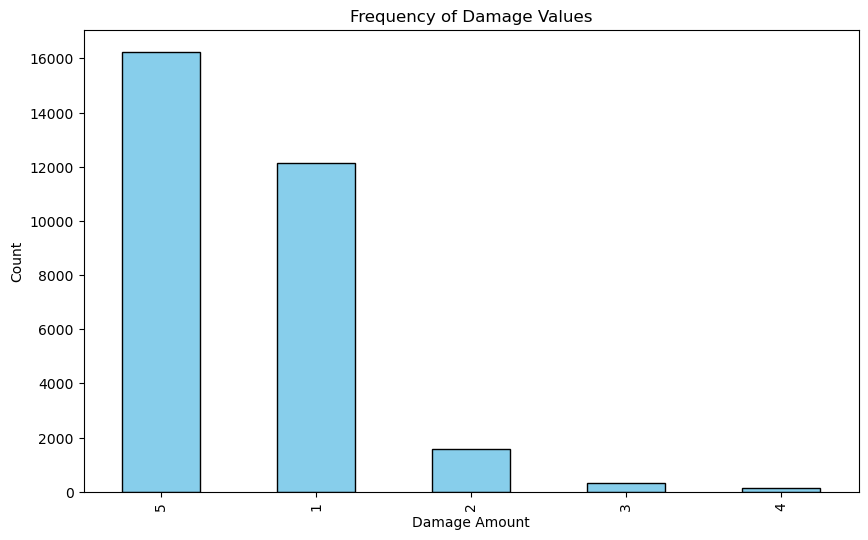

In [17]:
import matplotlib.pyplot as plt

damage_counts = firedf['Damage'].value_counts()

plt.figure(figsize=(10,6))
damage_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Damage Amount")
plt.ylabel("Count")
plt.title("Frequency of Damage Values")

plt.show()

In [3]:
tracts = gpd.read_file('Group Data/LA_County_ZIP_Codes.geojson')

In [19]:
print(type(tracts))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [20]:
tracts.head(25)

,OBJECTID,ZIPCODE,Shape_Length,Shape_Area,geometry
0,1,90001,48677.278478,9.556340e+07,"POLYGON ((-118.24338 33.98924, -118.24348 33.9..."
1,2,90002,44972.017035,8.275222e+07,"POLYGON ((-118.23431 33.96101, -118.23442 33.9..."
2,3,90003,63303.481758,1.026431e+08,"POLYGON ((-118.28285 33.97597, -118.28285 33.9..."
3,4,90004,52471.897635,8.395697e+07,"POLYGON ((-118.2841 34.08349, -118.28438 34.08..."
4,5,90005,88978.011128,3.688581e+07,"MULTIPOLYGON (((-118.33541 34.06179, -118.3353..."
5,6,90006,37832.454801,5.370366e+07,"POLYGON ((-118.28274 34.03964, -118.28277 34.0..."
6,7,90007,57886.269976,6.859609e+07,"POLYGON ((-118.29297 34.04066, -118.29331 34.0..."
7,8,90008,59093.418682,1.066446e+08,"POLYGON ((-118.36738 34.01807, -118.36763 34.0..."
8,9,90010,42372.009840,4.555115e+06,"POLYGON ((-118.28578 34.06197, -118.28586 34.0..."
9,10,90011,57120.064671,1.195795e+08,"POLYGON ((-118.24348 34.00247, -118.24348 34.0..."


<Axes: >

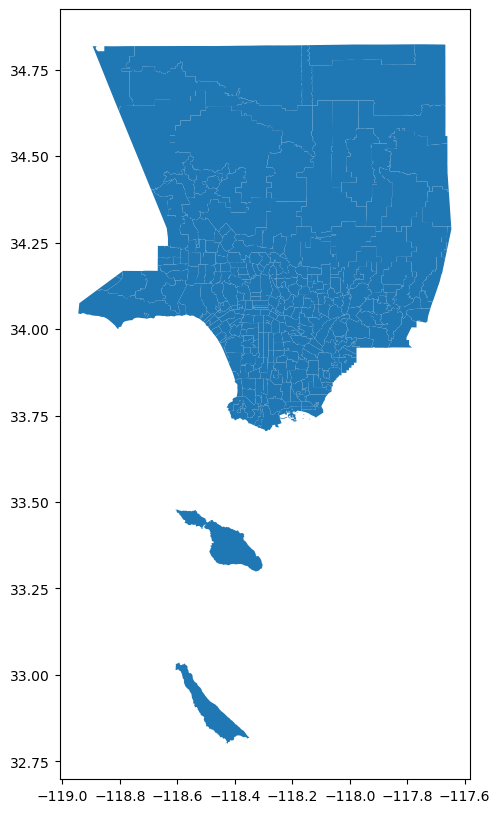

In [21]:
tracts.plot(figsize=(12,10))

In [22]:
# looking into the df
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      313 non-null    int32   
 1   ZIPCODE       313 non-null    object  
 2   Shape_Length  313 non-null    float64 
 3   Shape_Area    313 non-null    float64 
 4   geometry      313 non-null    geometry
dtypes: float64(2), geometry(1), int32(1), object(1)
memory usage: 11.1+ KB


In [23]:
print(tracts['ZIPCODE'].dtype)
print(firedf['ZipCode'].dtype)

object
float64


In [4]:
firedf['ZipCode'] = firedf['ZipCode'].astype(str) 
tracts['ZIPCODE'] = tracts['ZIPCODE'].astype(str) 

In [25]:
print(tracts['ZIPCODE'].dtype)
print(firedf['ZipCode'].dtype)

object
object


In [26]:
df_sorted[['ZipCode']].head(25)

,ZipCode
6246,91001.0
13266,91001.0
4857,91001.0
6701,91001.0
4743,91001.0
6705,91001.0
12817,91001.0
6014,91001.0
7338,91001.0
16715,91103.0


In [27]:
firedf["ZipCode"] = firedf["ZipCode"].astype(int).astype(str)

ValueError: invalid literal for int() with base 10: '91001.0'

so i needed to do an extra step here to get rid of the decimal places

In [5]:
firedf["ZipCode"] = firedf["ZipCode"].astype(str).str.replace(".0", "", regex=False)

let's make sure there are matching values now!

In [29]:
tracts["ZIPCODE"] = tracts["ZIPCODE"].str.strip()
firedf["ZipCode"] = firedf["ZipCode"].str.strip()

In [30]:
print(set(tracts["ZIPCODE"]).intersection(set(firedf["ZipCode"])))

{'90402', '91302', '91367', '90019', '91107', '91205', '91016', '91023', '90049', '91001', '91006', '91104', '91103', '90265', '90272', '90290', '91024'}


In [31]:
merged = tracts.merge(firedf, left_on="ZIPCODE", right_on="ZipCode", how="outer", indicator=True)
print(merged["_merge"].value_counts())  # Shows where mismatches occur

_merge
both          30046
right_only      401
left_only       296
Name: count, dtype: int64


time to merge

In [8]:
zip_fire = tracts.merge(firedf, left_on='ZIPCODE', right_on='ZipCode')

In [33]:
zip_fire.head()

,OBJECTID,ZIPCODE,Shape_Length,Shape_Area,geometry,Damage,StreetNumber,StreetName,Street Type,City,...,ZipCode,County,IncidentName,StructureType,StructureCategory,YearBuilt,SiteAddress,Latitude,Longitude,Damage_Count
0,17,90019,66607.662628,1.067585e+08,"POLYGON ((-118.32991 34.0594, -118.33022 34.05...",2,17406,Posetano,Road,Los Angeles,...,90019,Los Angeles,Palisades,Utility Misc Structure,Other 3 Structure,NaN,"5654 W PICO BLVD, LOS ANGELES, CA 90019",34.039416,-118.557132,1587
1,46,90049,132308.722406,4.264148e+08,"POLYGON ((-118.48932 34.13154, -118.48905 34.1...",1,3495,Mandeville Canyon,Road,Los Angeles,...,90049,Los Angeles,Palisades,Single Family Residence Single Story,Single Residence,1955.0,"3495 MANDEVILLE CANYON RD, LOS ANGELES, CA 90049",34.110995,-118.500413,12156
2,46,90049,132308.722406,4.264148e+08,"POLYGON ((-118.48932 34.13154, -118.48905 34.1...",1,3444,Mandeville Canyon,Road,Los Angeles,...,90049,Los Angeles,Palisades,Single Family Residence Single Story,Single Residence,1955.0,"3444 MANDEVILLE CANYON RD, LOS ANGELES, CA 90049",34.107896,-118.502046,12156
3,46,90049,132308.722406,4.264148e+08,"POLYGON ((-118.48932 34.13154, -118.48905 34.1...",1,3543,Mandeville Canyon,Road,Los Angeles,...,90049,Los Angeles,Palisades,Single Family Residence Multi Story,Single Residence,2000.0,"3543 MANDEVILLE CANYON RD, LOS ANGELES, CA 90049",34.112807,-118.500369,12156
4,46,90049,132308.722406,4.264148e+08,"POLYGON ((-118.48932 34.13154, -118.48905 34.1...",1,3817,Mandeville Canyon,Road,Los Angeles,...,90049,Los Angeles,Palisades,Single Family Residence Multi Story,Single Residence,1980.0,"3817 MANDEVILLE CANYON RD, LOS ANGELES, CA 90049",34.120190,-118.504963,12156


<Axes: >

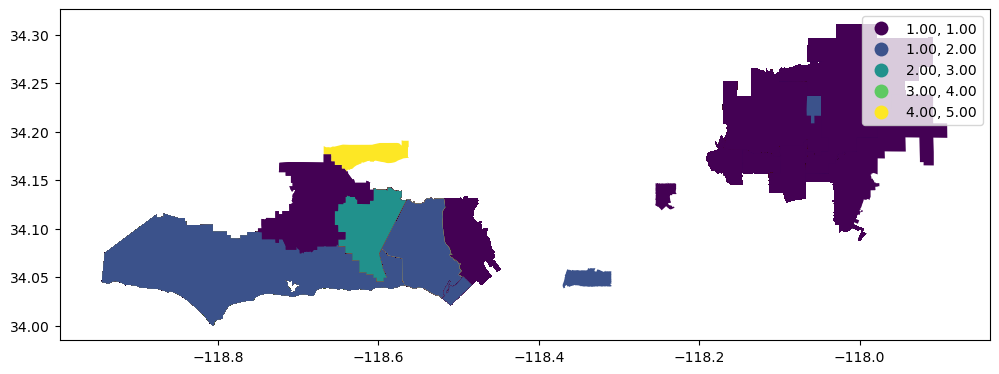

In [34]:
zip_fire.plot(figsize=(12,10),
                 column='Damage',
                 legend=True, 
                 scheme='NaturalBreaks')

so it doesn't seem like what i have attempted to do worked... will need to check in during office hours

but first let's see if we get different results trying to map a subset of damage in the data

In [15]:
subset_destroyed = firedf[firedf['Damage'] == 5]

In [16]:
subset_destroyed.head()

,Damage,StreetNumber,StreetName,Street Type,City,State,ZipCode,County,IncidentName,StructureType,StructureCategory,YearBuilt,SiteAddress,Latitude,Longitude
1,5,512,Devirian,Place,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1942.0,"512 DEVIRIAN PL, ALTADENA, CA 91001",34.196158,-118.158133
5,5,1676,Mendocino,Street,Altadena,CA,NaN,Los Angeles,Eaton,Utility Misc Structure,Other 3 Structure,1948.0,"1676 E MENDOCINO ST, ALTADENA, CA 91001",34.185505,-118.116065
7,5,1630,Carriage House,Road,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1960.0,"1630 CARRIAGE HOUSE RD, PASADENA, CA 91107",34.174901,-118.069415
8,5,1650,Carriage House,Road,Pasadena,CA,91107.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1959.0,"1650 CARRIAGE HOUSE RD, PASADENA, CA 91107",34.175257,-118.069801
9,5,3288,N Mount Curve,Avenue,Altadena,CA,91001.0,Los Angeles,Eaton,Single Family Residence Single Story,Single Residence,1947.0,"3288 N MOUNT CURVE AVE, ALTADENA, CA 91001",34.200429,-118.127325


In [19]:
subset_destroyed = subset_destroyed.copy()
subset_destroyed["ZipCode"] = subset_destroyed["ZipCode"].astype(str).str.replace(".0", "", regex=False)

In [20]:
tracts2 = gpd.read_file('Group Data/LA_County_ZIP_Codes.geojson')

In [21]:
destroyed = tracts2.merge(subset_destroyed, left_on='ZIPCODE', right_on='ZipCode')

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self._classify()


<Axes: >

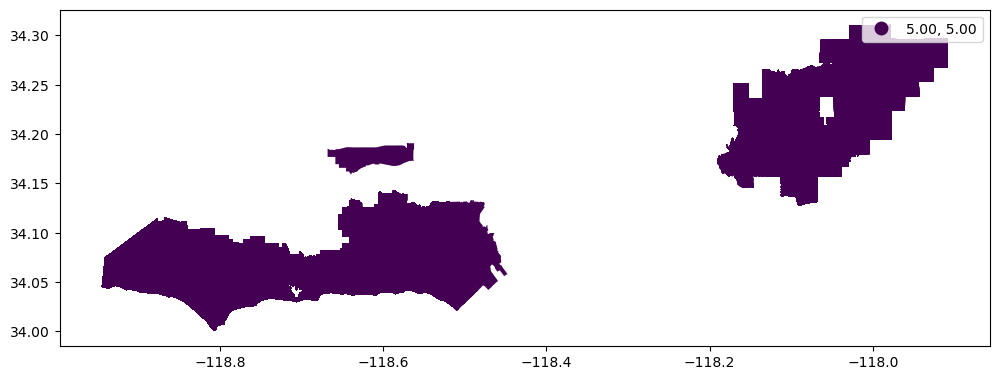

In [22]:
destroyed.plot(figsize=(12,10),
                 column='Damage',
                 legend=True, 
                 scheme='NaturalBreaks')

My next step is to figure out how to map damage in a better way. I want to visualize fire damage somehow, just not sure how at this point

### Folium

Let us see what happens with folium 

In [6]:
import folium

In [37]:
zip_fire['Damage'] = pd.to_numeric(zip_fire['Damage'], errors='coerce') 

In [38]:
zip_fire.dropna(subset=['Damage'], inplace=True) 

In [40]:
print(zip_fire.geometry.head())

0    POLYGON ((-118.32991 34.0594, -118.33022 34.05...
1    POLYGON ((-118.48932 34.13154, -118.48905 34.1...
2    POLYGON ((-118.48932 34.13154, -118.48905 34.1...
3    POLYGON ((-118.48932 34.13154, -118.48905 34.1...
4    POLYGON ((-118.48932 34.13154, -118.48905 34.1...
Name: geometry, dtype: geometry


In [39]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=zip_fire, # geo data
                  data=zip_fire, # data          
                  key_on='feature.properties.ZIPCODE', # key, or merge column
                  columns=['Damage', 'ZIPCODE'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Fire Damage from the Eaton and Palisades Fires').add_to(m)    # name on the legend color bar

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Clean the 'Damage' column and handle NaN values
zip_fire['Damage'] = pd.to_numeric(zip_fire['Damage'], errors='coerce')
zip_fire['Damage'].fillna(0, inplace=True)  # Replace NaNs with 0 (or use dropna() to drop rows)

# Create the base map
m = folium.Map(location=[34.2, -118.2], 
               zoom_start=9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# Plot choropleth
folium.Choropleth(
    geo_data=zip_fire,  # geo data
    data=zip_fire,  # data
    key_on='feature.properties.ZipCode',  # Adjust this to your GeoJSON property
    columns=['ZipCode', 'Damage'],  # Ensure proper column names
    fill_color='BuPu',
    line_weight=0.1, 
    fill_opacity=0.8,
    line_opacity=0.2,  # line opacity (of the border)
    legend_name='Fire Damage from the Eaton and Palisades Fires'
).add_to(m)

# Display the map
m

/tmp/ipykernel_145/3998397566.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zip_fire['Damage'].fillna(0, inplace=True)  # Replace NaNs with 0 (or use dropna() to drop rows)


In [9]:
# Clean the 'Damage' column and handle NaN values
zip_fire['Damage'] = pd.to_numeric(zip_fire['Damage'], errors='coerce')
zip_fire['Damage'] = zip_fire['Damage'].fillna(0)  # Replace NaNs with 0 (no inplace)

In [ ]:
# Continue with your folium code as before
m = folium.Map(location=[34.2, -118.2], 
               zoom_start=9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
    geo_data=zip_fire,  # geo data
    data=zip_fire,  # data
    key_on='feature.properties.ZipCode',  # Adjust this to your GeoJSON property
    columns=['ZipCode', 'Damage'],  # Ensure proper column names
    fill_color='BuPu',
    line_weight=0.1, 
    fill_opacity=0.8,
    line_opacity=0.2,  # line opacity (of the border)
    legend_name='Fire Damage from the Eaton and Palisades Fires'
).add_to(m)

m  # Display the map

the code above keeps crashing my server so i am not sure what to do next here